<a href="https://colab.research.google.com/github/ValexTinax/AnalysisTitanicSurvivors/blob/main/TitanicSurvivors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
#Import library

import pandas as pd
import os
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

os.environ['KAGGLE_CONFIG_DIR'] = '/content/sample_data'

In [27]:
!kaggle competitions download -c titanic

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 403, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /content/sample_data. Or use the environment method.


In [28]:
!unzip \*.zip && rm *.zip

unzip:  cannot find or open *.zip, *.zip.zip or *.zip.ZIP.

No zipfiles found.


In [29]:
#load the .csv file
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_genderSurvivors = pd.read_csv('gender_submission.csv')


In [68]:
#display the info
df_train.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [31]:
df_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [32]:
#Display multiple columns
df_train[['Name','Survived']]

,Name,Survived
0,"Braund, Mr. Owen Harris",0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1
2,"Heikkinen, Miss. Laina",1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1
4,"Allen, Mr. William Henry",0
...,...,...
886,"Montvila, Rev. Juozas",0
887,"Graham, Miss. Margaret Edith",1
888,"Johnston, Miss. Catherine Helen ""Carrie""",0
889,"Behr, Mr. Karl Howell",1


In [33]:
#count the unique value in the Survived column 0 = Not Survivor 1 = Survivor
df_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [34]:
#detective missing values and sum them
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [35]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [53]:
#drop the column with Null value
df_NewTrain= df_train.drop(columns=['Ticket','Embarked'], axis=1)
df_NewTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


Pclass
1    216
2    184
3    491
Name: PassengerId, dtype: int64


<Axes: xlabel='Pclass'>

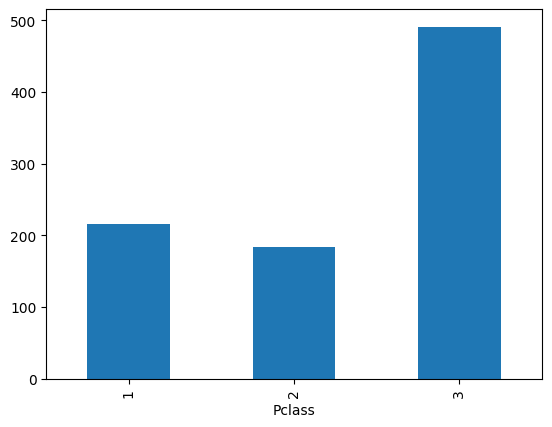

In [74]:
#How many ticket were sell for every class?
#Count the PassengerId by Pclass

pclass_df = df_NewTrain.groupby("Pclass").count()['PassengerId']
print(pclass_df)

#plot()
pclass_df.plot(kind="bar")


In [43]:
#How many people survived for every class ?
#group the mean of survived for every class
df_survived = df_NewTrain[["Pclass","Survived"]].groupby('Pclass').mean()
print(df_survived)

        Survived
Pclass          
1       0.629630
2       0.472826
3       0.242363


<Axes: xlabel='Pclass'>

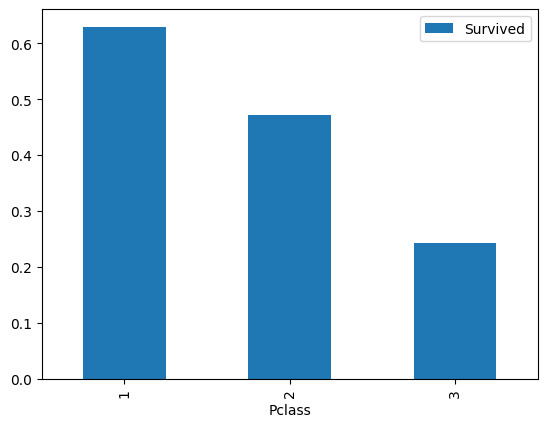

In [44]:
#Survived for every class
df_survived.plot(kind="bar")

<Axes: xlabel='Sex'>

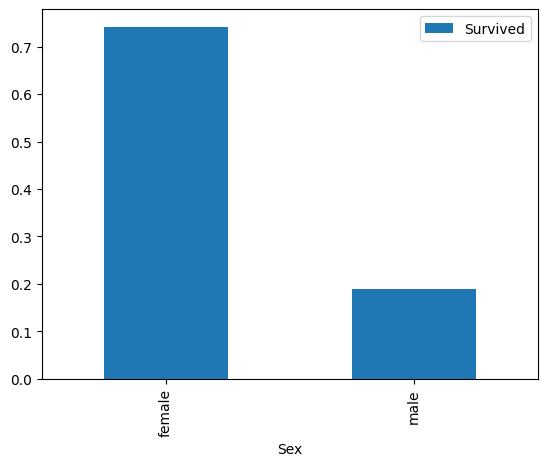

In [45]:
#Dsplay in a bar chart the average of Male and Female survived based on Suvived column
df_NewTrain[["Survived", "Sex"]].groupby("Sex").mean().plot(kind="bar")

<Axes: xlabel='Sex'>

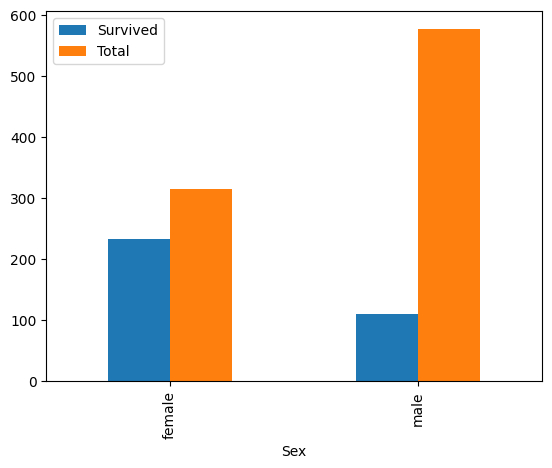

In [46]:
#SUM VALUES: 0 (Not Survived), 1 (Survived)
df_survived = df_NewTrain[["Survived","Sex"]].groupby("Sex").sum()

#COUNT TOTAL NUMBER of people PER CLASS (MALE, FEMALE)
df_survived["Total"] = df_NewTrain[['Survived','Sex']].groupby('Sex').count()
df_survived.plot(kind='bar')

In [78]:

###Find the child###
#people with age < 18 years
child_df = df_train[df_train['Age'] <= 18]
print(child_df.head())

#total row of children
tot_child = child_df.shape[0]
print(tot_child)

#SUM of total of children survived
child_survived= child_df['Survived'].sum()
print(child_survived)




    PassengerId  Survived  Pclass                                  Name  \
7             8         0       3        Palsson, Master. Gosta Leonard   
9            10         1       2   Nasser, Mrs. Nicholas (Adele Achem)   
10           11         1       3       Sandstrom, Miss. Marguerite Rut   
14           15         0       3  Vestrom, Miss. Hulda Amanda Adolfina   
16           17         0       3                  Rice, Master. Eugene   

       Sex   Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
7     male   2.0      3      1   349909  21.0750   NaN        S  
9   female  14.0      1      0   237736  30.0708   NaN        C  
10  female   4.0      1      1  PP 9549  16.7000    G6        S  
14  female  14.0      0      0   350406   7.8542   NaN        S  
16    male   2.0      4      1   382652  29.1250   NaN        Q  
139
70


In [80]:
###Find the adult###
adult_df= df_train[df_train['Age'] >= 18]
print(adult_df)


#rename column
adult_df =adult_df.rename(columns={'Sex':'People'})

#SUM of total of adults survived
survived_df= adult_df[['Survived','People']].groupby('People').sum()
print(survived_df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
885          886         0       3   
886          887         0       2   
887          888         1       1   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [77]:


#Count Total number of people per class
survived_df["Total"] = adult_df[['Survived','People']].groupby('People').count()

survived_df['%']= (survived_df['Survived']*100)/survived_df['Total']
print(survived_df)

        Survived
People          
female       159
male          70
        Survived  Total          %
People                            
female       159    206  77.184466
male          70    395  17.721519


          Survived  Total          %
People                              
female       164.0  212.0  77.358491
male          71.0  402.0  17.661692
children      61.0  113.0  53.982301


<Axes: xlabel='People'>

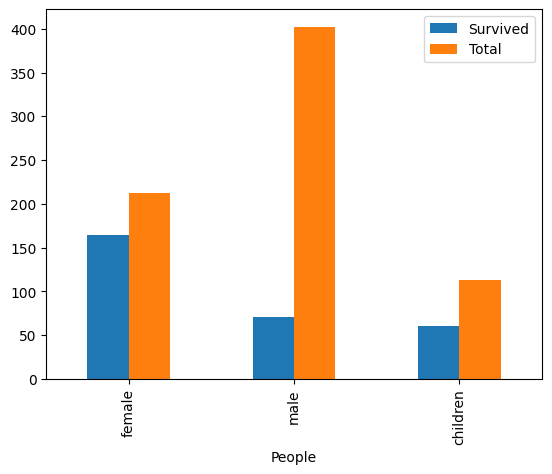

In [48]:

#Add column and values of Children data to survive_df
survived_df.loc['children'] = [child_survived, tot_child,(child_survived*100)/tot_child]
print(survived_df)

survived_df[['Survived','Total']].plot(kind='bar')

<ipython-input-49-122401ea5375>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_NewTrain.groupby('family_size').mean()['Survived'].plot(kind='bar')


<Axes: xlabel='family_size'>

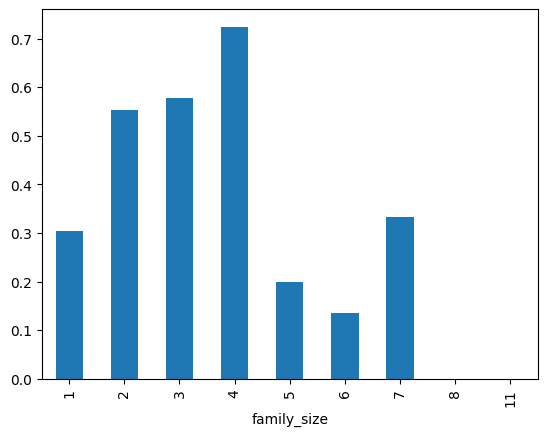

In [49]:
#BIG FAMILY
df_NewTrain['family_size'] = 1  + df_NewTrain['SibSp'] + df_NewTrain['Parch']
df_NewTrain.groupby('family_size').mean()['Survived'].plot(kind='bar')

In [50]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [62]:
#distinguished titles
df_NewTrain['Title'] = df_NewTrain['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
print(df_NewTrain)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

<Axes: xlabel='Title'>

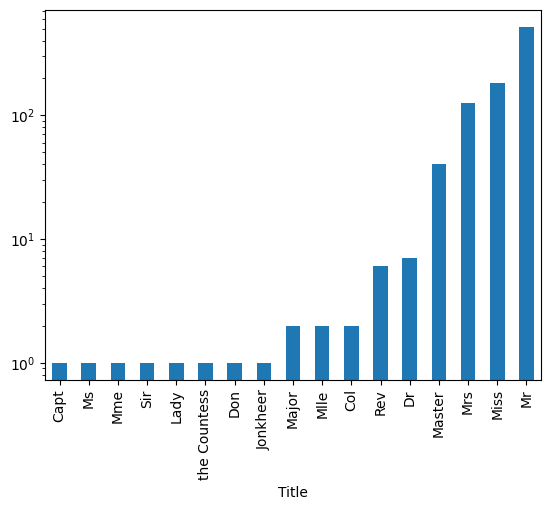

In [63]:
#Count how many people for 'Title'
df_NewTrain.groupby('Title').count()['PassengerId'].sort_values().plot(kind='bar', logy=True)

<ipython-input-65-b86965c165a1>:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_NewTrain.groupby('Title').mean()['Survived'].sort_values().plot(kind='bar')


<Axes: xlabel='Title'>

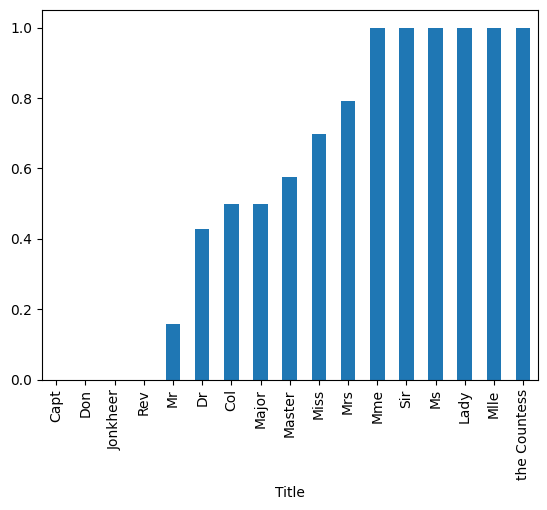

In [65]:
#count how many survivors for 'Title'
#1) Countess
#2)Mlle
#3)Lady
#4)Ms
#5)Sir
#..
df_NewTrain.groupby('Title').mean()['Survived'].sort_values().plot(kind='bar')


In [67]:
#count the people for every title
df_NewTrain.groupby('Title').count()[['PassengerId']]

,PassengerId
Title,
Capt,1
Col,2
Don,1
Dr,7
Jonkheer,1
Lady,1
Major,2
Master,40
Miss,182
